# Análisis exploratorio

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Lectura del dataset:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, auc, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

ruta_archivo = '/content/drive/MyDrive/ProyectoGrupalSIGE/dataset/cybersecurity_attacks.csv'
df = pd.read_csv(ruta_archivo)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:
# Información sobre el dataset
print("Columnas del Dataset")
df.columns

Columnas del Dataset


Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
print("Tamaño del Dataset")
df.shape

Tamaño del Dataset


(40000, 25)

In [ ]:
print("Contenido del Dataset")
df.head().T

Contenido del Dataset


,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [ ]:
# Número de valores nulos
print("Número de valores nulos de cada variable")
df.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

Número de valores nulos de cada variable


,0
Alerts/Warnings,20067
IDS/IPS Alerts,20050
Malware Indicators,20000
Firewall Logs,19961
Proxy Information,19851


In [ ]:
# Proporción de valores nulos
print("Proporción de valores nulos de cada variable")
df.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)/ len(df) * 100

Proporción de valores nulos de cada variable


,0
Alerts/Warnings,50.1675
IDS/IPS Alerts,50.1250
Malware Indicators,50.0000
Firewall Logs,49.9025
Proxy Information,49.6275


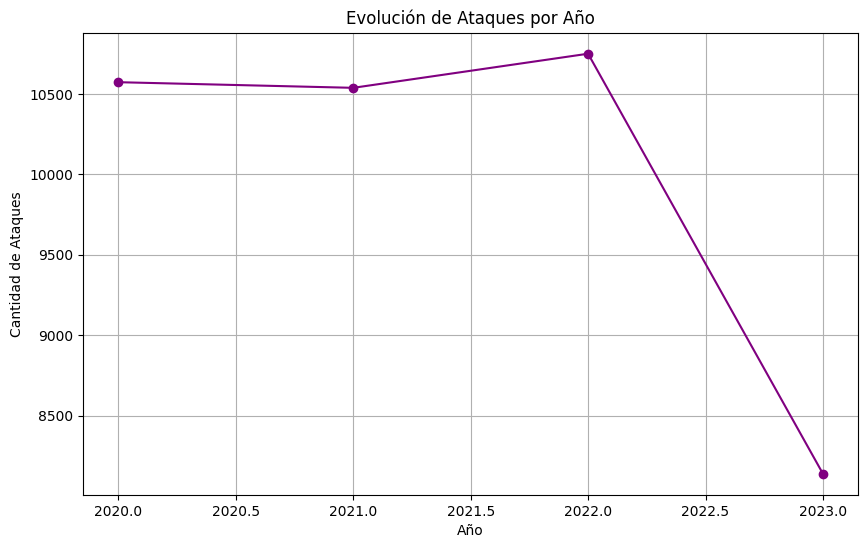

In [ ]:
# Evolución de ataques en función del año
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['year'] = df['Timestamp'].dt.year

attacks_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
attacks_per_year.plot(marker='o', linestyle='-', color='purple')
plt.title("Evolución de Ataques por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Ataques")
plt.grid(True)
plt.show()

Geo-location Data
Ghaziabad, Meghalaya                       16
Kalyan-Dombivli, Jharkhand                 15
Ghaziabad, Tripura                         14
Ghaziabad, Uttarakhand                     14
Ghaziabad, Jharkhand                       13
Motihari, Odisha                           13
Amroha, Sikkim                             13
Aurangabad, Nagaland                       13
Yamunanagar, Arunachal Pradesh             13
Srikakulam, Uttarakhand                    13
Kottayam, Nagaland                         13
Jalna, Andhra Pradesh                      12
Rampur, Gujarat                            12
Patna, Karnataka                           12
Ghaziabad, Odisha                          12
Ghaziabad, Nagaland                        12
Raurkela Industrial Township, Jharkhand    12
Imphal, Assam                              12
Bally, Maharashtra                         12
Aurangabad, Odisha                         12
Name: count, dtype: int64


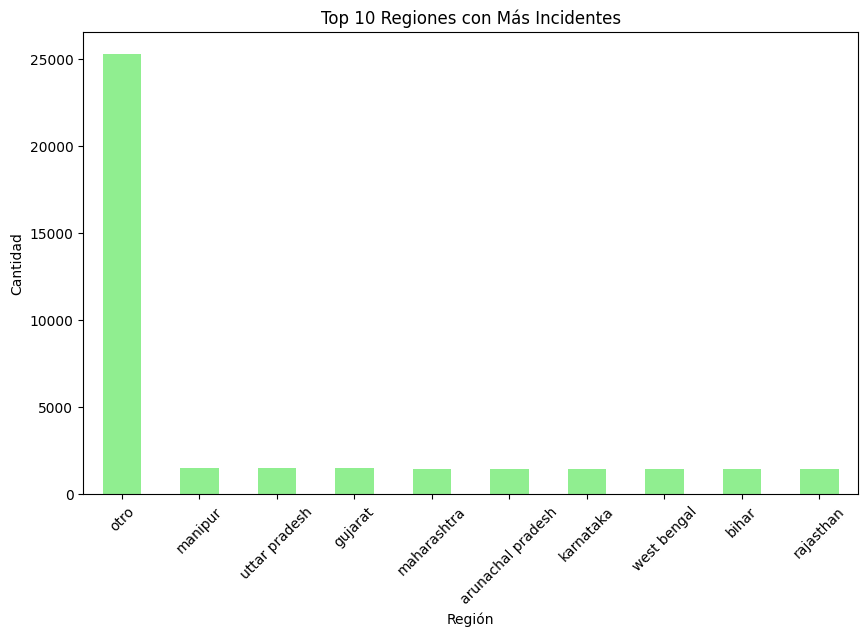

In [ ]:
df['country'] = df['Geo-location Data'].str.split(', ').str[-1]

print(df['Geo-location Data'].value_counts().head(20))

df['region'] = df['Geo-location Data'].apply(lambda x: x.split(', ')[-1].lower() if x != 'Otro' else 'otro')
top_regiones = df[df['region'] != 'otro']['region'].value_counts().nlargest(10).index
df['region'] = df['region'].apply(lambda x: x if x in top_regiones else 'otro')

plt.figure(figsize=(10,6))
df['region'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Regiones con Más Incidentes")
plt.xlabel("Región")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


#plt.figure(figsize=(10,6))
#df['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
#plt.title("Top 10 Países con Más Incidentes")
#plt.xlabel("País")
#plt.ylabel("Cantidad")
#plt.xticks(rotation=45)
#plt.show()

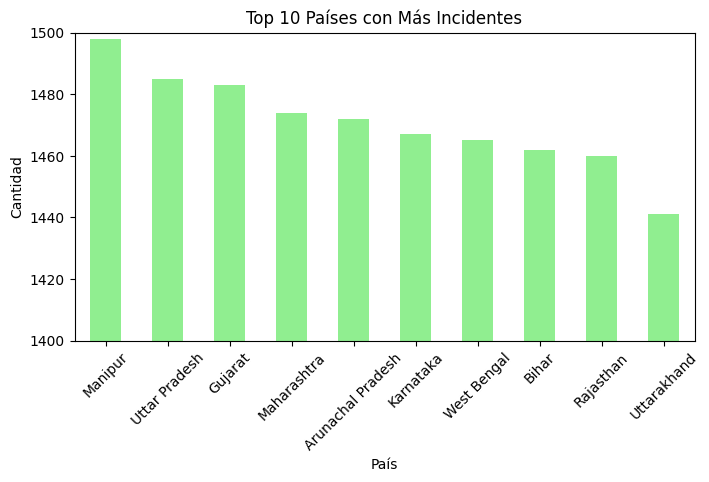

In [ ]:
plt.figure(figsize=(8,4))
plt.ylim(1400, 1500)
df['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Países con Más Incidentes")
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

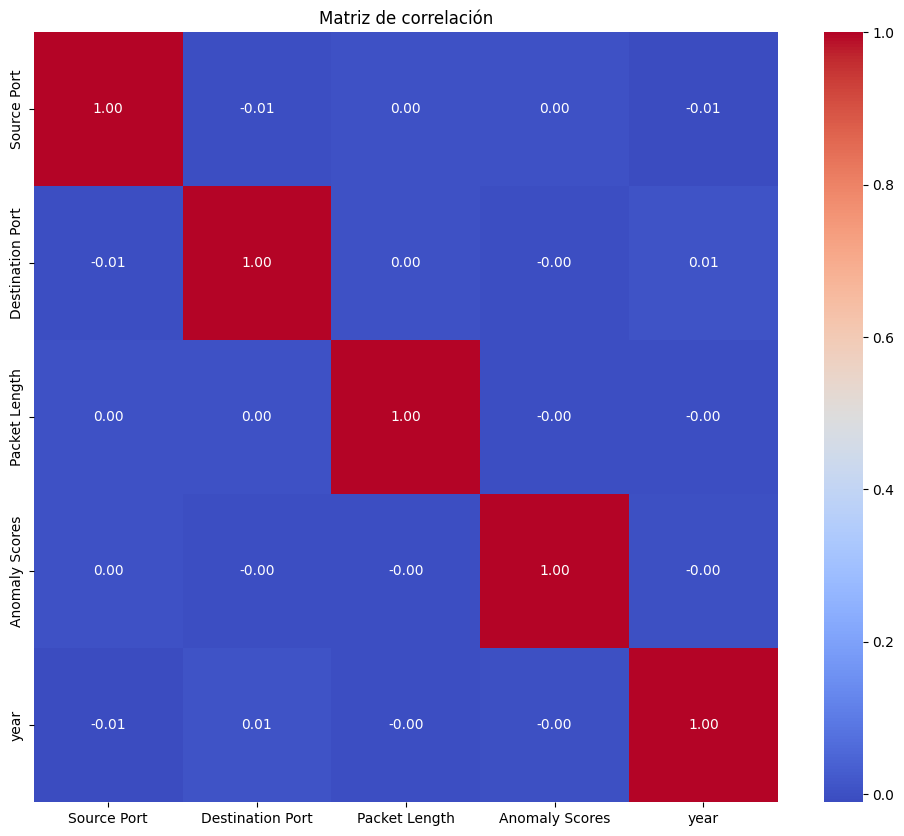

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Preprocesamiento de datos

In [ ]:
columnas_a_eliminar = [
    'Timestamp',
    'Source IP Address',
    'Destination IP Address',
    'Payload Data',
    'User Information',
    'Log Source',
]

# Eliminar solo las columnas que están presentes en el DataFrame
columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
df.drop(columns=columnas_existentes, inplace=True)

In [ ]:
# Comprobar valores binarios
alerts_unique = df['Alerts/Warnings'].unique()
print(alerts_unique)

ids_unique = df['IDS/IPS Alerts'].unique()
print(ids_unique)

malware_unique = df['Malware Indicators'].unique()
print(malware_unique)

firewall_unique = df['Firewall Logs'].unique()
print(firewall_unique)

proxy_unique = df['Proxy Information'].unique()
print(proxy_unique)

# A pesar de no tener valores nulos, se ha observado que podría pasarse a binario la columna Attack Signature
attack_unique = df['Attack Signature'].unique()
print(attack_unique)

[nan 'Alert Triggered']
[nan 'Alert Data']
['IoC Detected' nan]
['Log Data' nan]
['150.9.97.135' nan '114.133.48.179' ... '60.51.30.46' '137.76.130.8'
 '112.169.115.139']
['Known Pattern B' 'Known Pattern A']


In [ ]:
# Paso a binarios para todas las columnas
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 1 if x == 'Alert Triggered' else 0)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 1 if x == 'Alert Data' else 0)
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else 0)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 1 if x == 'Log Data' else 0)
df['Attack Signature'] = df['Attack Signature'].apply(lambda x: 'A' if x != 'Known Pattern B' else 'B')

# Nueva variable que resume las tres alertas clave
df['Triple_Alert'] = (
    (df['Malware Indicators'] == 1) &
    (df['Firewall Logs'] == 1) &
    (df['IDS/IPS Alerts'] == 1)
).astype(int)

# Para la columna Proxy Information, sustituimos los valores nulos por 'Sin proxy'
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'Sin proxy' if pd.isna(x) else x)

In [ ]:
# Comprobación de cambios
alerts_unique = df['Alerts/Warnings'].unique()
print(alerts_unique)

ids_unique = df['IDS/IPS Alerts'].unique()
print(ids_unique)

malware_unique = df['Malware Indicators'].unique()
print(malware_unique)

firewall_unique = df['Firewall Logs'].unique()
print(firewall_unique)

proxy_unique = df['Proxy Information'].unique()
print(proxy_unique)

attack_unique = df['Attack Signature'].unique()
print(attack_unique)

[0 1]
[0 1]
[1 0]
[1 0]
['150.9.97.135' 'Sin proxy' '114.133.48.179' ... '60.51.30.46'
 '137.76.130.8' '112.169.115.139']
['B' 'A']


Para comprobar el número de ataques que encontraremos en función del navegador, creamos una nueva columna a partir de la columna 'Device Information'

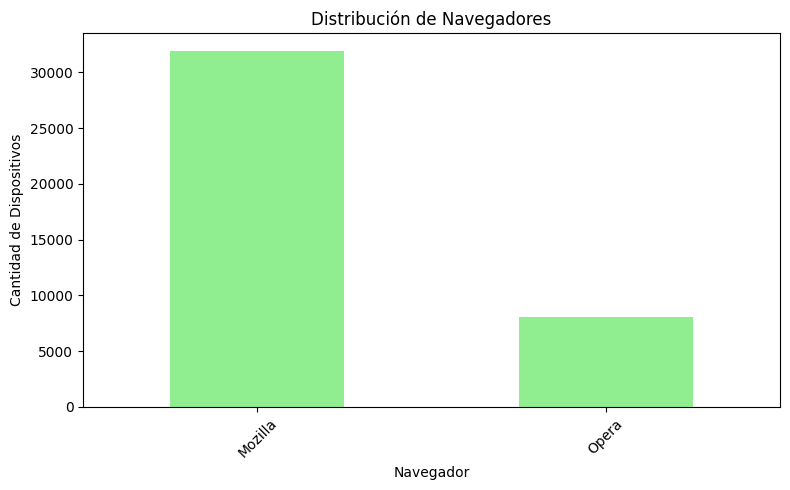

In [ ]:
# Extracción del navegador
df['Browser'] = df['Device Information'].str.split('/').str[0]
conteo_browser = df['Browser'].value_counts()

plt.figure(figsize=(8, 5))
conteo_browser.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Navegadores')
plt.xlabel('Navegador')
plt.ylabel('Cantidad de Dispositivos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Consulta los sistemas operativos
df['Device Information'].value_counts()

,count
Device Information,
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0),35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1),34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0),33
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1),31
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0),31
...,...
Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gecko/6248-04-01 13:49:59 Firefox/3.8,1
"Mozilla/5.0 (iPad; CPU iPad OS 10_3_3 like Mac OS X) AppleWebKit/531.1 (KHTML, like Gecko) CriOS/31.0.870.0 Mobile/22W332 Safari/531.1",1
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_8 rv:2.0; kk-KZ) AppleWebKit/532.10.1 (KHTML, like Gecko) Version/4.0.2 Safari/532.10.1",1


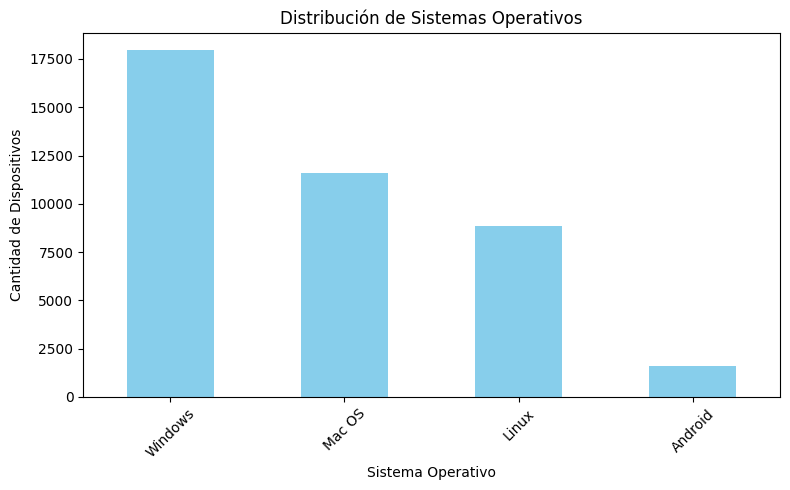

In [ ]:
# Extracción de los sistemas operativos
def simplificar_so(x):
    x = str(x)
    if re.search(r'Windows', x):
        return 'Windows'
    elif re.search(r'Linux', x):
        return 'Linux'
    elif re.search(r'Android', x):
        return 'Android'
    elif re.search(r'Mac OS', x):
        return 'Mac OS'
    else:
        return 'Otro'

df['SO'] = df['Device Information'].apply(simplificar_so)
df.drop(columns=['Device Information'], inplace=True)

conteo_so = df['SO'].value_counts()

plt.figure(figsize=(8, 5))
conteo_so.plot(kind='bar', color='skyblue')
plt.title('Distribución de Sistemas Operativos')
plt.xlabel('Sistema Operativo')
plt.ylabel('Cantidad de Dispositivos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Número de iPads: 1551
Número de iPods: 2656
Número de iPhones: 4223
Número de Macintosh: 5813


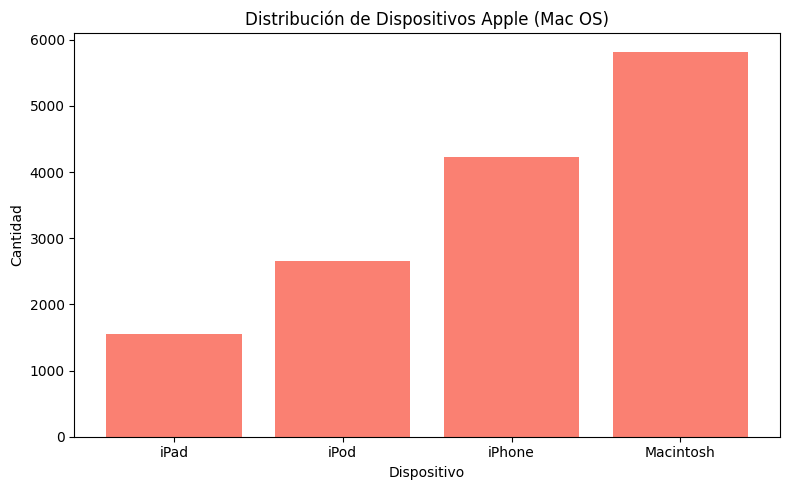

In [ ]:
# Dentro de Mac OS encontramos 4 dispositivos: iPad, iPod, iPhone y Macintosh
num_ipad = df['Device Information'].str.contains(r'iPad', case=False).sum()
num_ipod = df['Device Information'].str.contains(r'iPod', case=False).sum()
num_iphone = df['Device Information'].str.contains(r'iPhone', case=False).sum()
num_mac = df['Device Information'].str.contains(r'Macintosh', case=False).sum()

print(f"Número de iPads: {num_ipad}")
print(f"Número de iPods: {num_ipod}")
print(f"Número de iPhones: {num_iphone}")
print(f"Número de Macintosh: {num_mac}")

dispositivos_mac = {
    'iPad': num_ipad,
    'iPod': num_ipod,
    'iPhone': num_iphone,
    'Macintosh': num_mac
}

plt.figure(figsize=(8, 5))
plt.bar(dispositivos_mac.keys(), dispositivos_mac.values(), color='salmon')
plt.title('Distribución de Dispositivos Apple (Mac OS)')
plt.xlabel('Dispositivo')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Modelo predictivo para el tipo de ataque

## Relación de las variables con el tipo de ataque

<Figure size 1400x600 with 0 Axes>

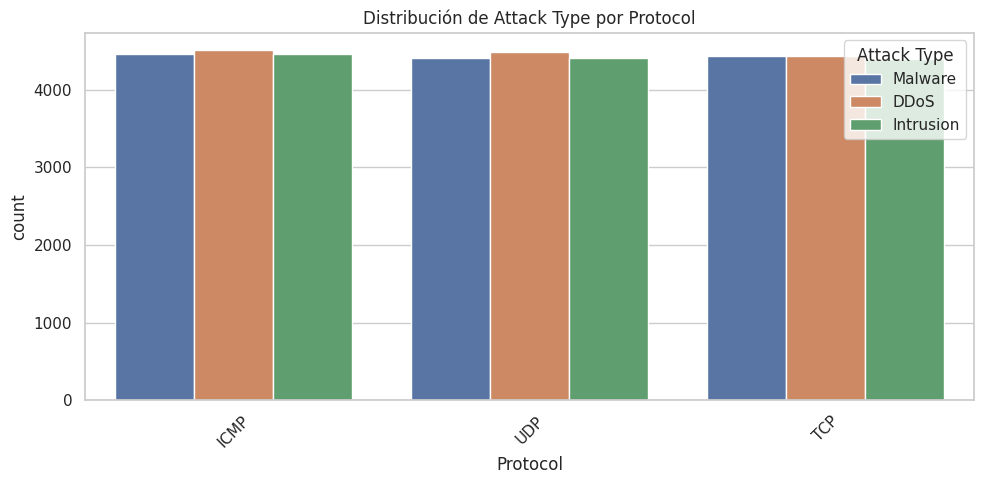

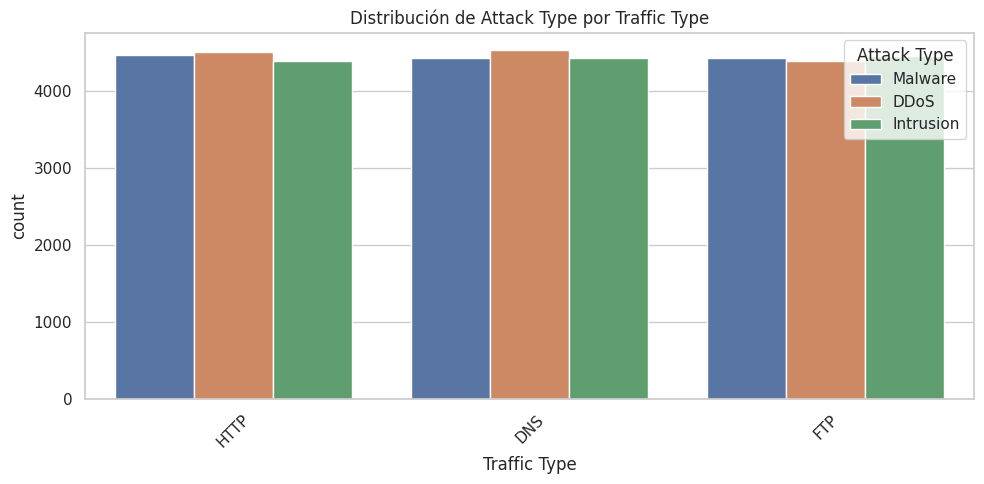

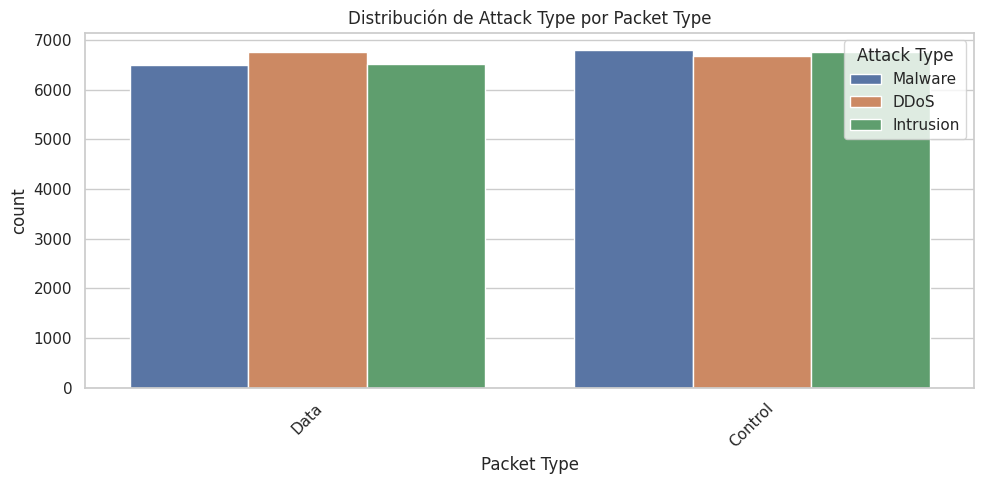

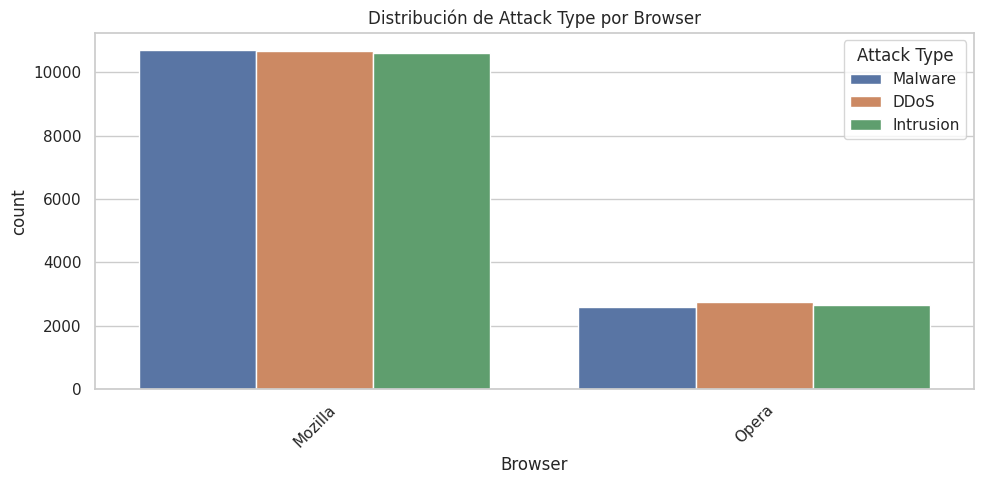

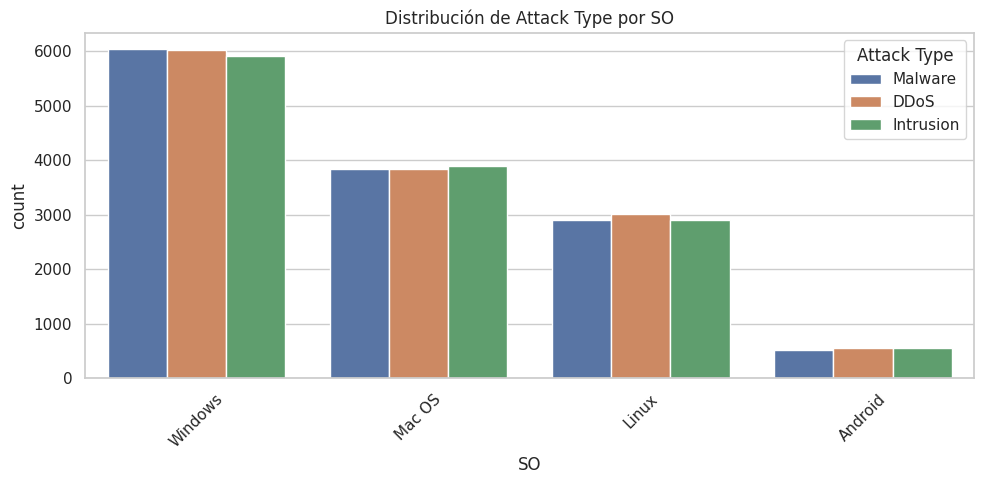

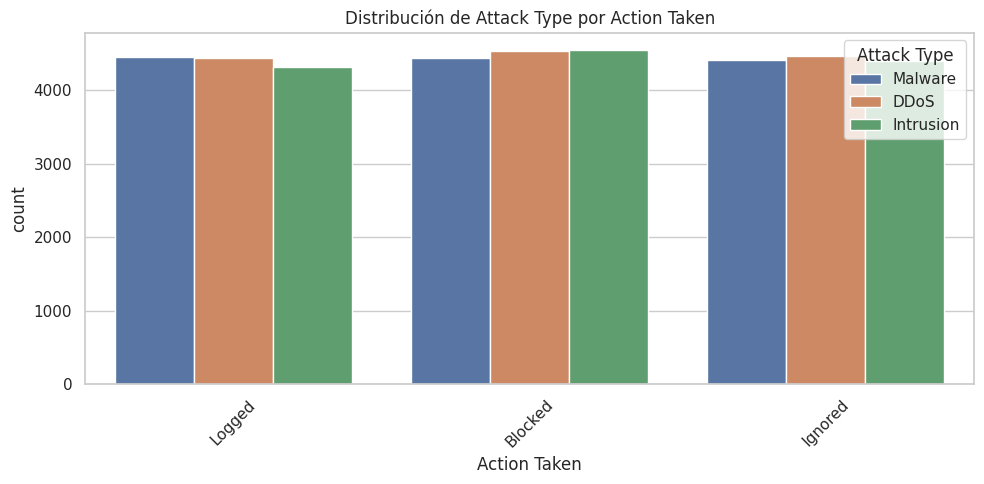

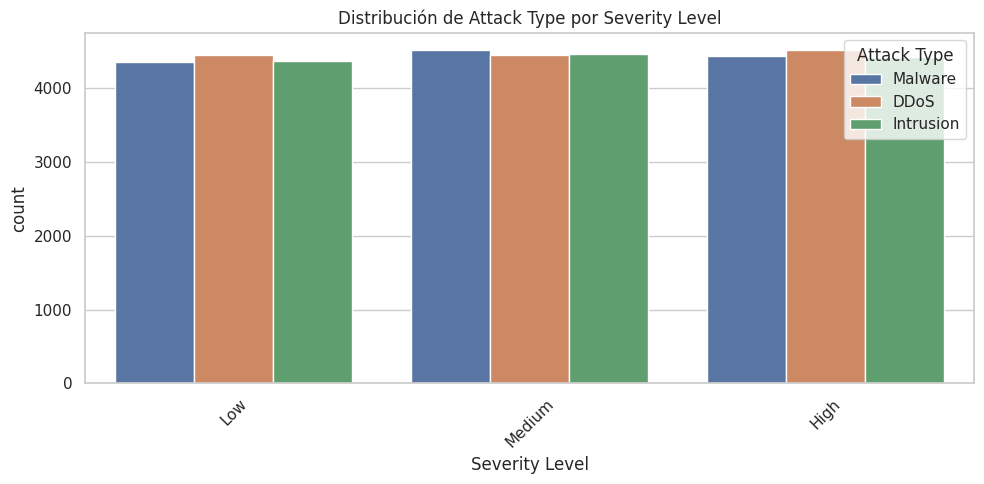

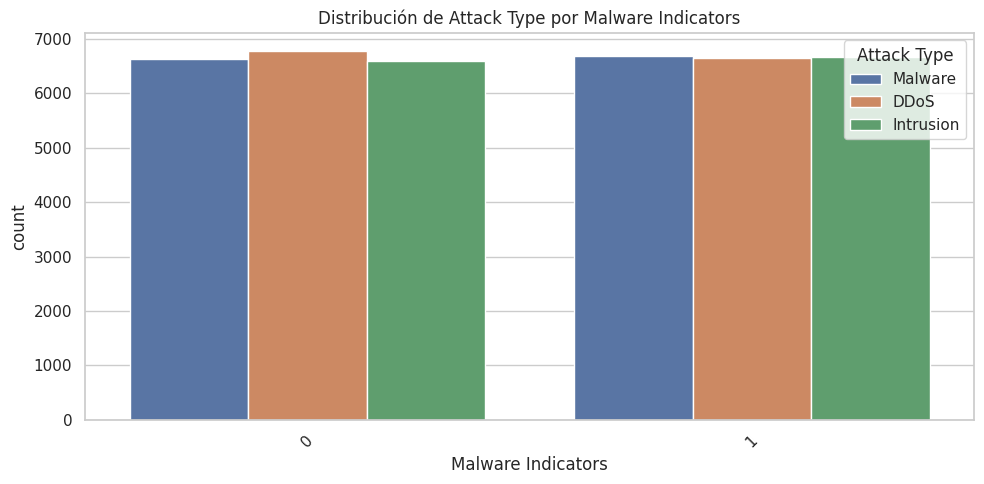

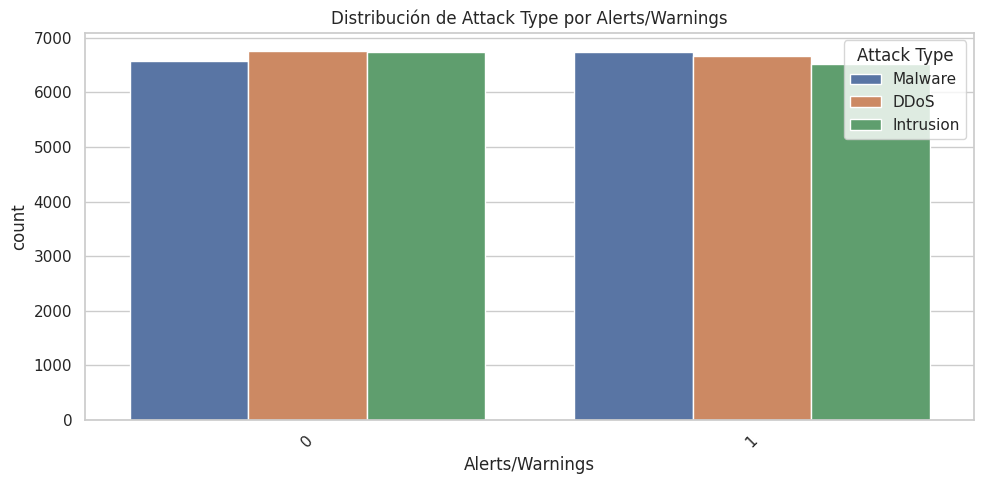

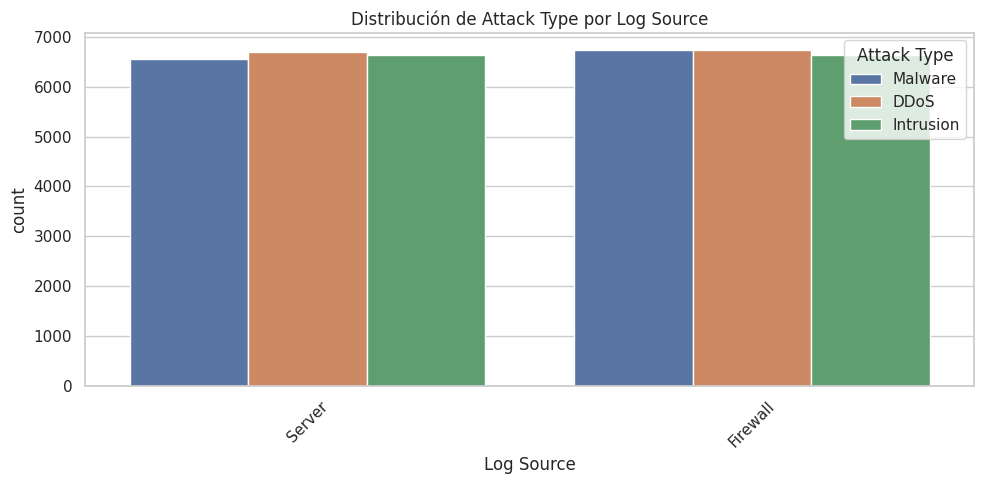

In [ ]:
# Variables categóricas
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
cat_vars = ['Protocol', 'Traffic Type', 'Packet Type', 'Browser', 'SO', 'Action Taken', 'Severity Level', 'Malware Indicators', 'Alerts/Warnings', 'Log Source']

for var in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=var, hue='Attack Type')
    plt.title(f'Distribución de Attack Type por {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

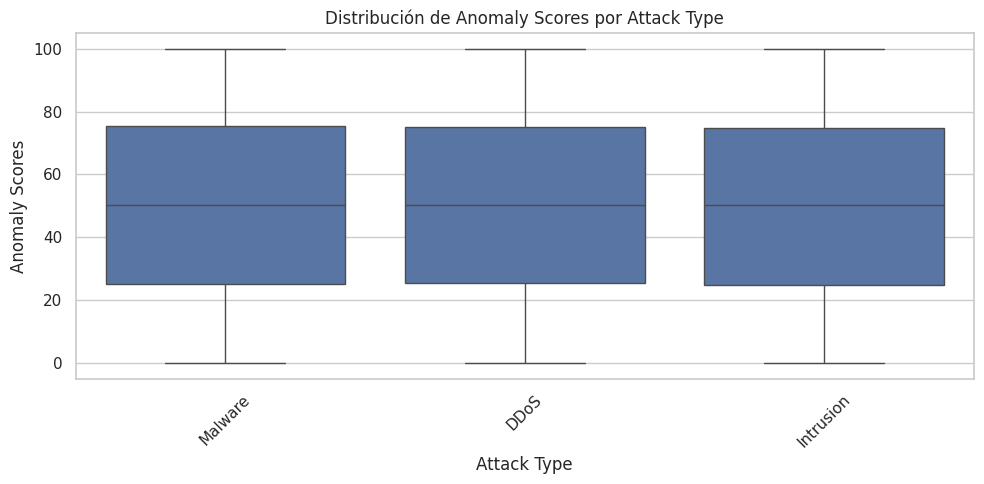

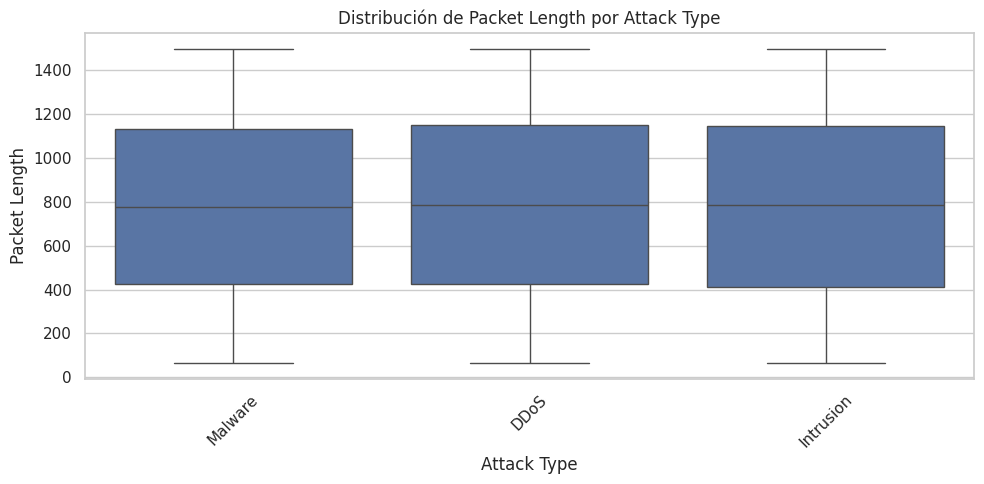

In [ ]:
# Variables numéricas
num_vars = ['Anomaly Scores', 'Packet Length']

for var in num_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Attack Type', y=var)
    plt.title(f'Distribución de {var} por Attack Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Comprobamos si las clases están balanceadas
print(df['Attack Type'].value_counts())

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


## Clasificación

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Muestra estratificada
df_sampled, _ = train_test_split(
    df, train_size=10000, stratify=df['Attack Type'], random_state=42
)

# Codificar variable objetivo
le = LabelEncoder()
df_sampled['Attack Type'] = le.fit_transform(df_sampled['Attack Type'])
y = df_sampled['Attack Type']
X = df_sampled.drop(columns=['Attack Type'])

# Separar variables categóricas y numéricas
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# Transformar los datos
X_processed = preprocessor.fit_transform(X)

# Selección de características con SelectKBest
selector = SelectKBest(score_func=f_classif, k=34000)
X_selected = selector.fit_transform(X_processed, y)

# Obtener nombres de features seleccionadas
all_feature_names = preprocessor.get_feature_names_out()
selected_mask = selector.get_support()
selected_feature_names = all_feature_names[selected_mask]

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

### Random Forest

              precision    recall  f1-score   support

        DDoS       0.34      0.98      0.51       672
   Intrusion       0.59      0.04      0.07       663
     Malware       0.46      0.03      0.05       665

    accuracy                           0.35      2000
   macro avg       0.46      0.35      0.21      2000
weighted avg       0.46      0.35      0.21      2000



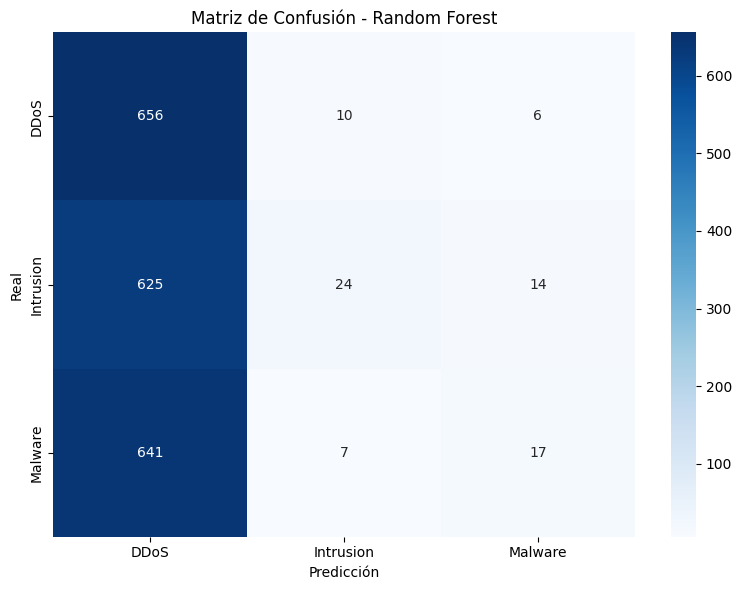

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Entrenamiento
clf = RandomForestClassifier(n_estimators=50, max_depth=30, random_state=42)
clf.fit(X_train, y_train)

# Evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores hiperparámetros encontrados:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        DDoS       0.35      0.98      0.51       672
   Intrusion       0.66      0.04      0.08       663
     Malware       0.51      0.04      0.07       665

    accuracy                           0.36      2000
   macro avg       0.50      0.35      0.22      2000
weighted avg       0.50      0.36      0.22      2000



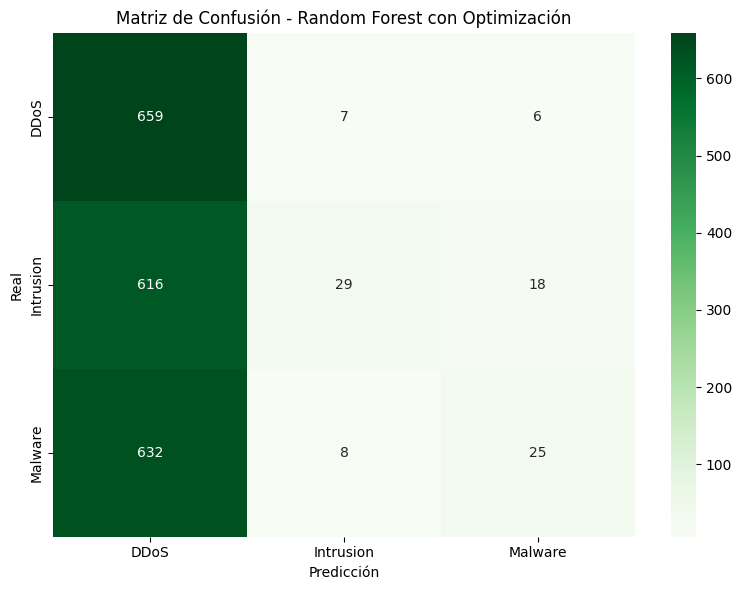

In [ ]:
# Random Forest con optimización de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
clf_hp = grid_search.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

y_pred_hp = clf_hp.predict(X_test)
print(classification_report(y_test, y_pred_hp, target_names=le.classes_))

# Matriz de confusión
cm_hp = confusion_matrix(y_test, y_pred_hp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hp, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest con Optimización')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:25:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

        DDoS       0.35      0.23      0.28       672
   Intrusion       0.33      0.33      0.33       663
     Malware       0.34      0.46      0.39       665

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.33      2000
weighted avg       0.34      0.34      0.33      2000



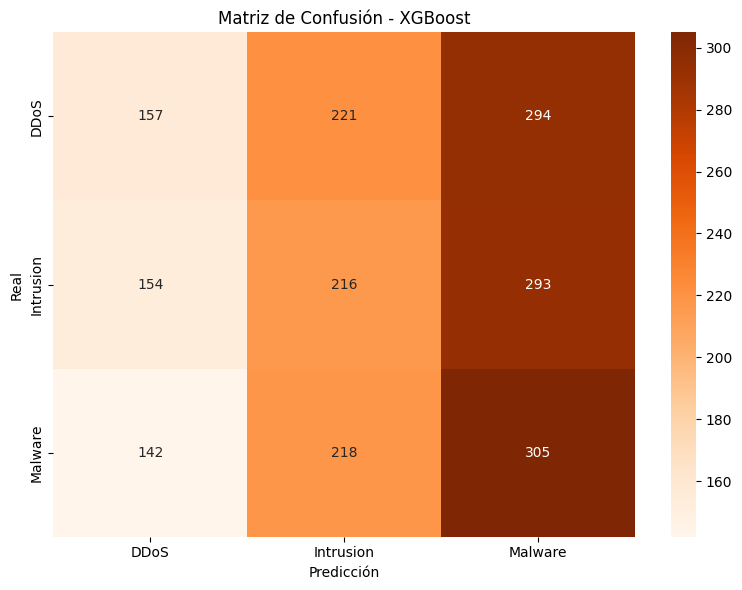

In [ ]:
# XGBoost
xgb_clf = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost')
plt.tight_layout()
plt.show()

In [ ]:
# Redes convolucionales
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_selected)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [ ]:
n_classes = len(set(y))

model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.7287 - loss: 0.6615 - val_accuracy: 0.7290 - val_loss: 0.7779
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9227 - loss: 0.2080 - val_accuracy: 0.6640 - val_loss: 1.4407
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9720 - loss: 0.0810 - val_accuracy: 0.6265 - val_loss: 2.5999
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9865 - loss: 0.0393 - val_accuracy: 0.6170 - val_loss: 3.7450
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9895 - loss: 0.0336 - val_accuracy: 0.6430 - val_loss: 3.7670
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.6190 - val_loss: 4.2153


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

        DDoS       1.00      0.97      0.99       672
   Intrusion       0.56      1.00      0.72       663
     Malware       0.89      0.21      0.34       665

    accuracy                           0.73      2000
   macro avg       0.82      0.73      0.68      2000
weighted avg       0.82      0.73      0.68      2000



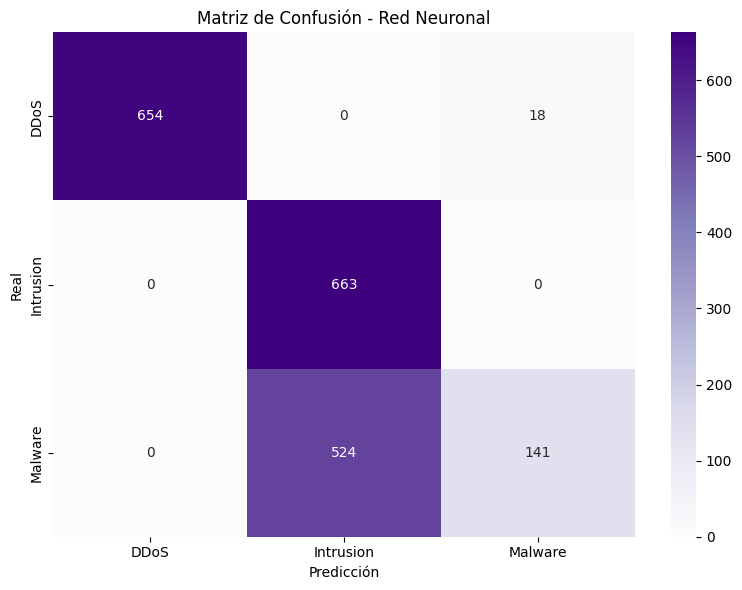

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm_cnn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Red Neuronal')
plt.tight_layout()
plt.show()

### Ensemble

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

        DDoS       1.00      0.96      0.98       672
   Intrusion       0.61      1.00      0.76       663
     Malware       0.90      0.36      0.52       665

    accuracy                           0.78      2000
   macro avg       0.84      0.78      0.75      2000
weighted avg       0.84      0.78      0.75      2000



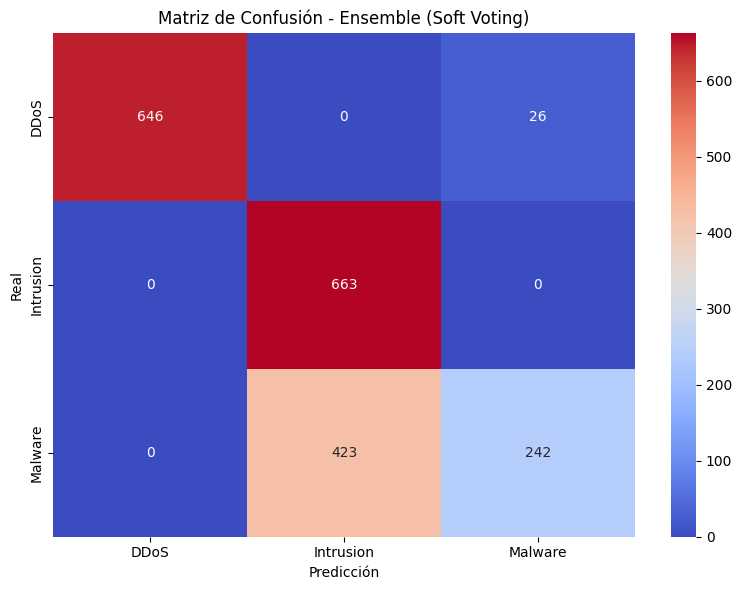

In [ ]:
# Obtener probabilidades de predicción para cada modelo
probs_rf = clf.predict_proba(X_test)
probs_rf_hp = clf_hp.predict_proba(X_test)
probs_xgb = xgb_clf.predict_proba(X_test)
probs_cnn = model.predict(X_test)

# Promediar probabilidades
probs_ensemble = (probs_rf + probs_rf_hp + probs_xgb + probs_cnn) / 4

# Tomar la clase con mayor probabilidad promedio
y_pred_ensemble = np.argmax(probs_ensemble, axis=1)

# Evaluación
print(classification_report(y_test, y_pred_ensemble, target_names=le.classes_))

# Matriz de confusión
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Ensemble (Soft Voting)')
plt.tight_layout()
plt.show()